<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
columns_to_replace_zero = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'DiabetesPedigreeFunction']
for column in columns_to_replace_zero:
    X[column] = X[column].replace(0, np.nan)
X = X.fillna(X.median())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train_scaled, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test_scaled)

adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_confusion = confusion_matrix(y_test, adaboost_predictions)
print("\nAdaBoost Results:")
print(f"Accuracy: {adaboost_accuracy:.4f}")
print("Confusion Matrix:\n", adaboost_confusion)
print(classification_report(y_test, adaboost_predictions))



AdaBoost Results:
Accuracy: 0.7727
Confusion Matrix:
 [[80 19]
 [16 39]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)
print("Random Forest (Bagging) Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:\n", rf_confusion)
print(classification_report(y_test, rf_predictions))


Random Forest (Bagging) Results:
Accuracy: 0.7338
Confusion Matrix:
 [[78 21]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)
gb_predictions = gb_classifier.predict(X_test_scaled)

gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion = confusion_matrix(y_test, gb_predictions)
print("\nGradient Boosting Results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print("Confusion Matrix:\n", gb_confusion)
print(classification_report(y_test, gb_predictions))


Gradient Boosting Results:
Accuracy: 0.7597
Confusion Matrix:
 [[79 20]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)
xgb_predictions = xgb_classifier.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_confusion = confusion_matrix(y_test, xgb_predictions)
print("\nXGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print("Confusion Matrix:\n", xgb_confusion)
print(classification_report(y_test, xgb_predictions))


XGBoost Results:
Accuracy: 0.7143
Confusion Matrix:
 [[73 26]
 [18 37]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [ ]:
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [rf_accuracy, adaboost_accuracy, gb_accuracy, xgb_accuracy]


<ipython-input-59-943a65ac1a6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


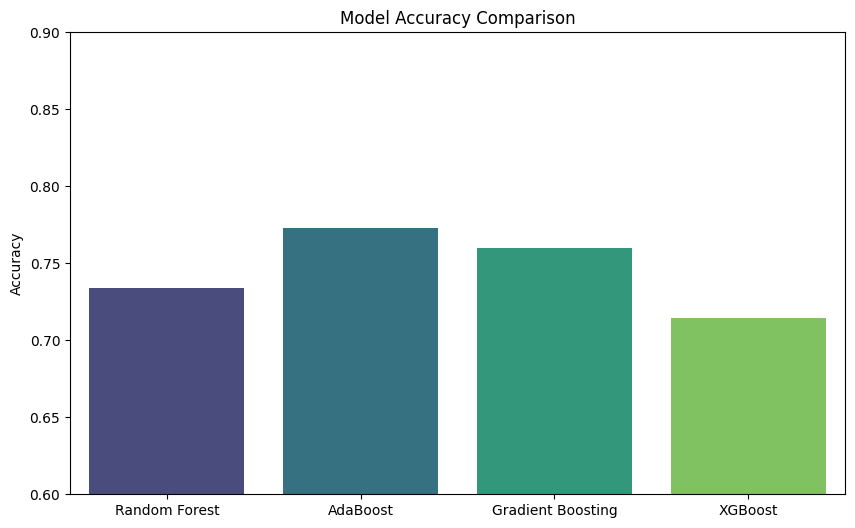

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.9)
plt.show()

In [ ]:
best_model_index = np.argmax(accuracies)
best_model_name = model_names[best_model_index]
best_model_accuracy = accuracies[best_model_index]

print(f"\nThe most accurate model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}.")


The most accurate model is AdaBoost with an accuracy of 0.7727.
